In [1]:
# change into the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
    
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
import mopet

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

!rm exploration.h5

def evalFunction(params):
    result_float = abs((params["x"] ** 2 + params["y"] ** 2) - 1)
    result_array = np.random.randn(np.random.randint(1, 131), np.random.randint(1, 5000))
    result = {}
    result["float_result"] = result_float
    result["array_result"] = result_array
    return result

params = {"x": 1.3, "y": 2.7, "z": 0.0}
explore_params = {"x": np.linspace(-2, 2, 21), "y": np.linspace(-2, 2, 21)}
    
ex = mopet.Exploration(evalFunction, params, explore_params)

In [3]:
ex.run()

2020-03-13 02:24:43,091	INFO resource_spec.py:212 -- Starting Ray with 4.2 GiB memory available for workers and up to 2.12 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-13 02:24:43,592	INFO services.py:1093 -- View the Ray dashboard at localhost:8267
INFO:root:Runs took 4.124690294265747 s to submit.
100%|██████████| 441/441 [00:02<00:00, 212.81it/s]
INFO:root:Runs and storage took 2.078352212905884 s to complete.


In [4]:
ex.load_results()

INFO:root:exploration.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exploration_2020_03_13_02H_24M_43S``
INFO:root:441 results loaded.
INFO:root:Creating new results DataFrame
INFO:root:exploration.h5 closed.


In [5]:
ex.results

{0: {'array_result': array([[-1.06964451,  0.59527931,  0.4138899 , ...,  1.30358036,
          -0.98662143,  0.90970318],
         [ 0.31617454,  0.3688046 , -0.25590092, ...,  0.35000747,
           0.42208591, -0.04930091],
         [ 3.64017892, -0.52428716,  1.22376432, ...,  1.6725849 ,
          -0.29018676, -1.21895622],
         ...,
         [-0.27038651,  1.95843668, -0.81451043, ..., -1.62231764,
           0.11201796, -0.69828754],
         [-1.43133922,  2.40703564, -0.94558189, ...,  0.04860402,
           0.03435919, -1.33660997],
         [ 0.36670758, -0.58790729,  2.02718365, ...,  0.32972407,
          -0.27339605, -1.21594721]]), 'float_result': 7.0},
 1: {'array_result': array([[-0.11611091, -1.6828075 , -0.11790684, ..., -0.43072014,
           2.45653905,  1.21608093],
         [ 1.82078264,  0.39181597,  1.16797679, ...,  0.86898941,
          -0.84299233,  0.18597596],
         [-0.11306929,  0.37357587, -0.36500001, ...,  0.24419225,
          -0.25566848,  0

In [6]:
ex.df["result"] = None
for r in ex.df.index:
    ex.df.loc[r, "result"] = ex.results[r]['float_result']

In [7]:
ex.df

,x,y,result
0,-2,-2,7
1,-2,-1.8,6.24
10,-2,0,3
100,-1.2,1.2,1.88
101,-1.2,1.4,2.4
...,...,...,...
95,-1.2,0.2,0.48
96,-1.2,0.4,0.6
97,-1.2,0.6,0.8
98,-1.2,0.8,1.08


In [8]:
pivoted = ex.df.pivot_table(values='result', index = 'y', columns='x', aggfunc='first')

Text(0, 0.5, 'y')

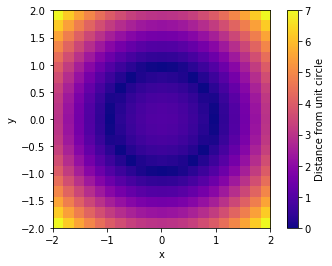

In [9]:
plt.imshow(pivoted, \
           extent = [min(ex.df.x), max(ex.df.x),
                     min(ex.df.y), max(ex.df.y)], origin='lower')
plt.colorbar(label='Distance from unit circle')
plt.xlabel("x")
plt.ylabel("y")